In [1]:
import ExperimentoRutherford
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import time
import math

Simulacion = ExperimentoRutherford.simulacion

In [9]:
def SimulacionOneCPU(N        ,
               categoria      ,
               z_a            ,
               num_laminas    ,
               atom_radius    ,
               diametro_celda ,
               vel_inicial    , 
               max_deslocacion,
               clave_proceso  ):
    
    metrica_desviaciones = ExperimentoRutherford.simulacion(N,
                                                            categoria      ,
                                                            z_a            ,
                                                            num_laminas    ,
                                                            atom_radius    ,
                                                            diametro_celda ,
                                                            vel_inicial    ,
                                                            max_deslocacion,
                                                            f"Resultado{clave_proceso}.txt", 
                                                            verbose=False)
    return metrica_desviaciones
    
    
    


def ExperimentoNumerico(N,
                        cpus         = 2  ,
                        tipo_cristal ="fcc",
                        z_a          = 79 ,
                        num_laminas  = 1  ,
                        atom_radius  = 1.44e-10,
                        diametro_celda = 4.07e-10,
                        vel_inicial    = 1.57e7,
                        max_deslocacion= 0.5):
    
    
    # Hacemos parámetros compatibles.
    if tipo_cristal == "pc":
        categoria = 1
    elif tipo_cristal == "bcc":
        categoria = 2
    elif tipo_cristal == "fcc":
        categoria = 3
    else:
        raise ValueError("Los tipos de cristal disponibles son \"pc\",\"bcc\" y \"fcc\"")
    metrica = 0
    if cpus == 1:
        # Corremos en una sola cpu.
        metrica_desviaciones = SimulacionOneCPU(N              ,
                                                categoria      ,
                                                z_a            ,
                                                num_laminas    ,
                                                atom_radius    ,
                                                diametro_celda ,
                                                vel_inicial    , 
                                                max_deslocacion,
                                                0 )
        
        # Recopilamos Resultado
        array_resultado = np.loadtxt(f"Resultado{0}.txt")
        # Diccionario salida 
        Output = {"datos":array_resultado,"metrica":metrica}
        return Output
    else:
        # Repartimos el trabajo entre las cpus.
        tamaño_rebanada            = math.floor(N/cpus)
        processes = []
        for i in range(cpus):
            process = multiprocessing.Process(target=SimulacionOneCPU,args=(tamaño_rebanada,
                                                                            categoria      ,
                                                                            z_a            ,
                                                                            num_laminas    ,
                                                                            atom_radius    ,
                                                                            diametro_celda ,
                                                                            vel_inicial    ,
                                                                            max_deslocacion,
                                                                            i              ))
            processes.append(process)
            process.start()
        for process in processes:
            process.join()
            
        # Recopilamos los resultados.
        array_resultado = np.loadtxt(f"Resultado{0}.txt")
        for num_resultado in range(i):
            i += 1
            resultado       =  np.loadtxt(f"Resultado{num_resultado}.txt")
            try:
                array_resultado =  np.append(array_resultado,resultado,axis=0)
            except ValueError:
                pass
        
        # Diccionario de salida.
        # ! Falta sumar las desviaciones de las rebanadas.
        Output = {"datos":array_resultado,"metrica":metrica}
        return Output

In [ ]:
# Prueba

inicio = time.time()
output = ExperimentoNumerico(N=3_000,cpus=1)
final  = time.time()
tiempo = round(final-inicio,2)

inicio = time.time()
output = ExperimentoNumerico(N=3_000,cpus=6)
final  = time.time()
tiempo_multi = round(final-inicio,2)

print(f"Tiempo de ejecución one   cpu {tiempo} s")
print(f"Tiempo de ejecución multi cpu {tiempo_multi} s")

Tiempo aproximado  de los experimentos entre 3 a 15 minutos dependiendo de la maquina y los cpus ocupados.

Iniciando experimento 1 ...
Experimento 1 tardo 4.96 s en completarse
Iniciando experimento 2 ...
Experimento 2 tardo 14.02 s en completarse
Iniciando experimento 3 ...
Experimento 3 tardo 26.38 s en completarse
Iniciando experimento 4 ...
Experimento 4 tardo 145.75 s en completarse
La serie de experimentos tardo 191.10239338874817 s en completarse
Graficando resultados...


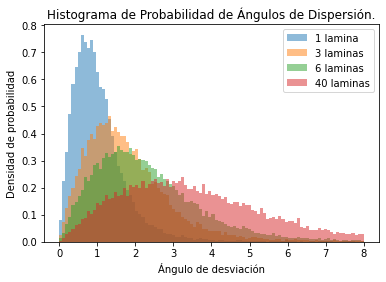

In [18]:
print("Tiempo aproximado  de los experimentos entre 3 a 15 minutos dependiendo de la maquina y los cpus ocupados.\n")

inicio = time.time()
print("Iniciando experimento 1 ...")
inicio1   = time.time()
output     = ExperimentoNumerico(N=30_000,tipo_cristal="fcc",cpus=6,num_laminas=1)
resultados = output["datos"]
x = resultados[:,0]
y = resultados[:,1]
z = resultados[:,2]
pos     = resultados[:,0:3]
pp      = np.sum(pos*np.array([0,1,0]),axis=1)
angulos1 = np.arccos(pp)*180 / math.pi
final1   = time.time()
tiempo   = round(final1-inicio1,2)
print(f"Experimento 1 tardo {tiempo} s en completarse")

print("Iniciando experimento 2 ...")
inicio2 = time.time()
output     = ExperimentoNumerico(N=30_000,tipo_cristal="fcc",cpus=6,num_laminas=3)
resultados = output["datos"]
x = resultados[:,0]
y = resultados[:,1]
z = resultados[:,2]
pos     = resultados[:,0:3]
pp      = np.sum(pos*np.array([0,1,0]),axis=1)
angulos3 = np.arccos(pp)*180 / math.pi
final2 = time.time()
tiempo   = round(final2-inicio2,2)
print(f"Experimento 2 tardo {tiempo} s en completarse")

print("Iniciando experimento 3 ...")
inicio3 = time.time()
output     = ExperimentoNumerico(N=30_000,tipo_cristal="fcc",cpus=6,num_laminas=6)
resultados = output["datos"]
x = resultados[:,0]
y = resultados[:,1]
z = resultados[:,2]
pos     = resultados[:,0:3]
pp      = np.sum(pos*np.array([0,1,0]),axis=1)
angulos6 = np.arccos(pp)*180 / math.pi
final3 = time.time()
tiempo   = round(final3-inicio3,2)
print(f"Experimento 3 tardo {tiempo} s en completarse")

print("Iniciando experimento 4 ...")
inicio4 = time.time()
output     = ExperimentoNumerico(N=30_000,tipo_cristal="fcc",cpus=6,num_laminas=40)
resultados = output["datos"]
x = resultados[:,0]
y = resultados[:,1]
z = resultados[:,2]
pos     = resultados[:,0:3]
pp      = np.sum(pos*np.array([0,1,0]),axis=1)
angulos40 = np.arccos(pp)*180 / math.pi
final4  = time.time()
tiempo   = round(final4-inicio4,2)
print(f"Experimento 4 tardo {tiempo} s en completarse")

final = time.time()
tiempo_total = final-inicio
print(f"La serie de experimentos tardo {tiempo_total} s en completarse")

print("Graficando resultados...")
n1,bins1  ,_ = plt.hist(angulos1,bins=100,density=True,range=(0,8),alpha=0.5, label="1 lamina")

n3,bins3  ,_ = plt.hist(angulos3,bins=100,density=True,range=(0,8),alpha=0.5, label="3 laminas")
index3   = np.argmax(n3)
max_ang3 = bins1[index3]

n6,bins6  ,_ = plt.hist(angulos6,bins=100,density=True,range=(0,8),alpha=0.5, label="6 laminas")
index6   = np.argmax(n6)
max_ang6 = bins1[index6]

n40,bins40,_ = plt.hist(angulos40,bins=100,density=True,range=(0,8),alpha=0.5, label="40 laminas")
index40   = np.argmax(n40)
max_ang40 = bins1[index40]

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de desviación")
plt.ylabel("Densidad de probabilidad")
plt.legend()

Iniciando experimento 1 ...
Experimento 1 tardo 5.08 s en completarse
Iniciando experimento 2 ...
Experimento 2 tardo 13.82 s en completarse
Graficando resultados...


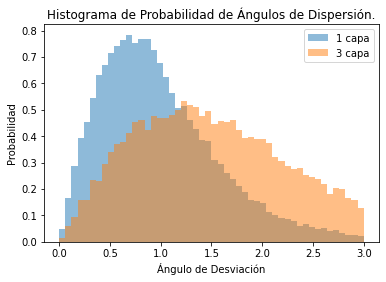

In [8]:
max_deslocacion = 0.5
N = 30_000
tipo_cristal="fcc"
bins = 50
print("Iniciando experimento 1 ...")
inicio1   = time.time()
output     = ExperimentoNumerico(N=N,tipo_cristal=tipo_cristal,cpus=6,num_laminas=1,max_deslocacion=max_deslocacion)
resultados = output["datos"]
x = resultados[:,0]
y = resultados[:,1]
z = resultados[:,2]
pos     = resultados[:,0:3]
pp      = np.sum(pos*np.array([0,1,0]),axis=1)
angulos1 = np.arccos(pp)*180 / math.pi
final1   = time.time()
tiempo   = round(final1-inicio1,2)
print(f"Experimento 1 tardo {tiempo} s en completarse")

print("Iniciando experimento 2 ...")
inicio2 = time.time()
output     = ExperimentoNumerico(N=N,tipo_cristal=tipo_cristal,cpus=6,num_laminas=3,max_deslocacion=max_deslocacion)
resultados = output["datos"]
x = resultados[:,0]
y = resultados[:,1]
z = resultados[:,2]
pos     = resultados[:,0:3]
pp      = np.sum(pos*np.array([0,1,0]),axis=1)
angulos3 = np.arccos(pp)*180 / math.pi
final2 = time.time()
tiempo   = round(final2-inicio2,2)
print(f"Experimento 2 tardo {tiempo} s en completarse")

print("Graficando resultados...")
n1,bins1  ,_ = plt.hist(angulos1,bins=bins,density=True,range=(0,3),alpha=0.5, label="1 capa")
n1,bins1  ,_ = plt.hist(angulos3,bins=bins,density=True,range=(0,3),alpha=0.5, label="3 capa")

plt.title("Histograma de Probabilidad de Ángulos de Dispersión.")
plt.xlabel("Ángulo de Desviación")
plt.ylabel("Probabilidad")
plt.legend()